In [21]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/

In [1]:
import pandas as pd
import numpy as np
import glob
import re

def get_files(file_dir,factor,time):
    all_files = [f for f in glob.glob(file_dir + '/' + '*' + '_' + factor + '_' + time + '*' + '.' + 'featurecounts.counts.txt')] 
    return all_files

def get_files_72h(file_dir,factor,process):
    if process=='Bulk':
        all_files = [f for f in glob.glob(file_dir + '/' + '*' + '_' + factor + '_72hr-' + process + '*' + '.' + 'featurecounts.counts.txt')] 
    else:
        all_files = [f for f in glob.glob(file_dir + '/' + '*' + '_' + factor + '_72hr-' + process + '*' + '.' + 'featurecounts.counts.txt')]
    return all_files

def column_name(s):
    items = ['0hr', '2hr']
    if any(i in s for i in items):
        name = '.'.join(s.split('/')[-1].replace('_0hr','_00hr').replace('_2hr','_02hr').split('.')[:1])
    else:
        name = '.'.join(s.split('/')[-1].split('.')[:1])
    return name

In [2]:
get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th2','2hr')

['/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep1.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep3.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep2.star2.featurecounts.counts.txt',
 '/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/KS88_Th2_2hr_rep4.star2.featurecounts.counts.txt']

#### count files for each timepoint of Th2

In [3]:
count_files = {
    'Th2.Bulk.00hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th2','0hr'),
    'Th2.Bulk.02hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th2','2hr'),
    'Th2.Bulk.16hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th2','16hr'),
    'Th2.Bulk.24hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th2','24hr'),
    'Th2.Bulk.48hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th2','48hr'),
    'Th2.Sort.72hr':get_files_72h('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th2','Sort')
}

for factor, files in count_files.items():
    df = None
    for file in files:
        df_tmp = pd.read_csv(file, sep='\t', skiprows=1, index_col=0)
        df_tmp.columns = df_tmp.columns[:-1].tolist() + [column_name(file)]


        if df is None:
            df = df_tmp.loc[:,[df_tmp.columns[-1]]]
        else:
            df = df.join(df_tmp.loc[:, df_tmp.columns[-1]], how='right')

    count_columns = ["rep" in c for c in df.columns]
    df.loc[:, count_columns] = df.loc[:, count_columns].astype(dtype='int')

    df.to_csv('/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/%s.count.txt' % factor, sep='\t')


In [4]:
!head /data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.02hr.count.txt

Geneid	KS88_Th2_02hr_rep1	KS88_Th2_02hr_rep3	KS88_Th2_02hr_rep2	KS88_Th2_02hr_rep4
ENSMUSG00000102693.1	0	0	0	0
ENSMUSG00000064842.1	0	0	0	0
ENSMUSG00000051951.5	0	0	0	0
ENSMUSG00000102851.1	0	0	0	0
ENSMUSG00000103377.1	0	0	0	0
ENSMUSG00000104017.1	0	0	0	0
ENSMUSG00000103025.1	0	0	0	0
ENSMUSG00000089699.1	0	0	0	0
ENSMUSG00000103201.1	0	0	0	0


#### merge all count files for Th2

In [5]:
count_Th2 = [
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.00hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.02hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.16hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.24hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.48hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.72hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Sort.72hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Bulk.96hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.Sort.96hr.count.txt'
]

df=None
for count in count_Th2:
    df_tmp=pd.read_csv(count, sep='\t')
    if df is None:
        df = df_tmp
    else:
        df = df.merge(df_tmp, on='Geneid',how='inner')
        
df = df[['Geneid','KS88_Th2_00hr_rep1','KS88_Th2_00hr_rep2','KS88_Th2_00hr_rep3','KS88_Th2_00hr_rep4',
         'KS88_Th2_02hr_rep1','KS88_Th2_02hr_rep2','KS88_Th2_02hr_rep3','KS88_Th2_02hr_rep4',
         'KS88_Th2_16hr_rep1','KS88_Th2_16hr_rep2','KS88_Th2_16hr_rep3','KS88_Th2_16hr_rep4',
         'KS88_Th2_24hr_rep1','KS88_Th2_24hr_rep2','KS88_Th2_24hr_rep3','KS88_Th2_24hr_rep4',
         'KS88_Th2_48hr_rep1','KS88_Th2_48hr_rep2','KS88_Th2_48hr_rep3','KS88_Th2_48hr_rep4',
         'KS88_Th2_72hr-Sort_rep1','KS88_Th2_72hr-Sort_rep2','KS88_Th2_72hr-Sort_rep3','KS88_Th2_72hr-Sort_rep4']]

df.columns = df.columns.str.replace('_','.')
df.to_csv('/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.count.txt', sep='\t')


In [1]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/plots/

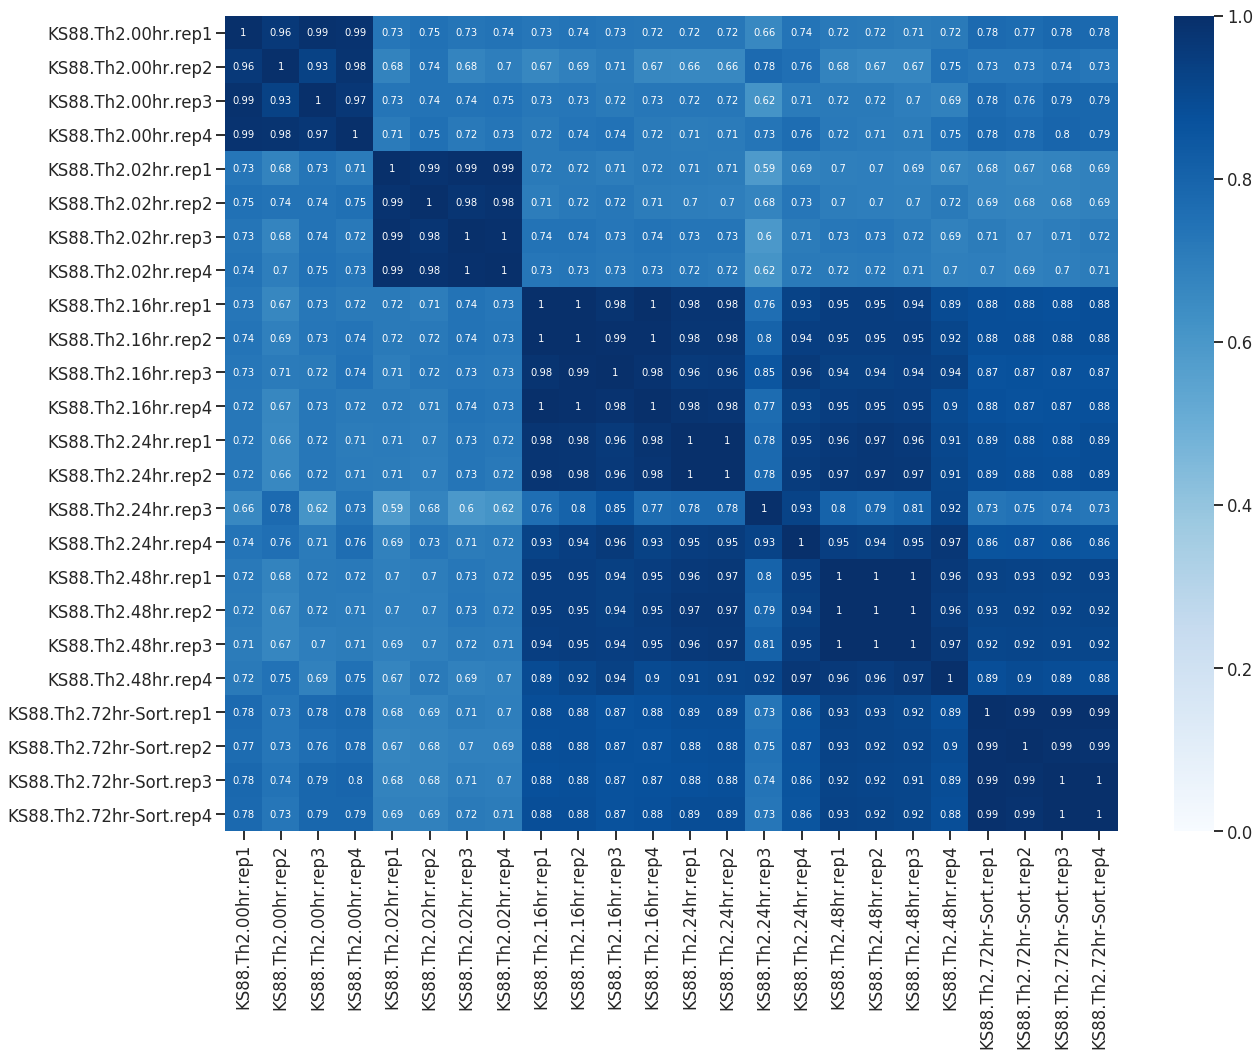

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

th2 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.count.txt', sep='\t')
th2 = th2.drop(columns=['Unnamed: 0','Geneid'])


correlations = th2.corr()

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax, vmin=0, vmax=1)
#plt.savefig('/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/plots/Th2_correlation_plot_between_replicates.pdf')
plt.show()

In [6]:
count_files_Th1 = {
    'Th1.Bulk.00hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th1','0hr'),
    'Th1.Bulk.02hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th1','2hr'),
    'Th1.Bulk.16hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th1','16hr'),
    'Th1.Bulk.24hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th1','24hr'),
    'Th1.Bulk.48hr':get_files('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th1','48hr'),
    #'Th1.Bulk.72hr':get_files_72h('/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb','Th1','Bulk'),
    'Th1.Sort.72hr':get_files_72h('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts','Th1','Sorted')
}

for fact, file in count_files_Th1.items():
    df = None
    for f in file:
        df_tmp = pd.read_csv(f, sep='\t', skiprows=1, index_col=0)
        df_tmp.columns = df_tmp.columns[:-1].tolist() + [column_name(f)]
        if df is None:
            df = df_tmp.loc[:,[df_tmp.columns[-1]]]
        else:
            df = df.join(df_tmp.loc[:, df_tmp.columns[-1]], how='right')

    count_columns = ["rep" in c for c in df.columns]
    df.loc[:, count_columns] = df.loc[:, count_columns].astype(dtype='int')
    
    df.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/%s.count.txt' % fact, sep='\t')

In [8]:
count_Th1 = [
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.Bulk.00hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.Bulk.02hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.Bulk.16hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.Bulk.24hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.Bulk.48hr.count.txt',
'/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.Sort.72hr.count.txt'
]

df=None
for count in count_Th1:
    df_tmp=pd.read_csv(count, sep='\t')
    if df is None:
        df = df_tmp
    else:
        df = df.merge(df_tmp, on='Geneid',how='inner')
        

df = df[['Geneid','KS191_Th1_00hr_rep1','KS191_Th1_00hr_rep2','KS191_Th1_00hr_rep3',
        'KS191_Th1_02hr_rep1','KS191_Th1_02hr_rep2','KS191_Th1_02hr_rep3',
        'KS191_Th1_16hr_rep1','KS191_Th1_16hr_rep2','KS191_Th1_16hr_rep3',
        'KS191_Th1_24hr_rep1','KS191_Th1_24hr_rep2','KS191_Th1_24hr_rep3',
        'KS191_Th1_48hr_rep1','KS191_Th1_48hr_rep2','KS191_Th1_48hr_rep3', 
        'KS191_Th1_72hr-Sorted_rep1','KS191_Th1_72hr-Sorted_rep2','KS191_Th1_72hr-Sorted_rep3']]

df.columns = df.columns.str.replace('_','.')
df.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.count.txt', sep='\t')


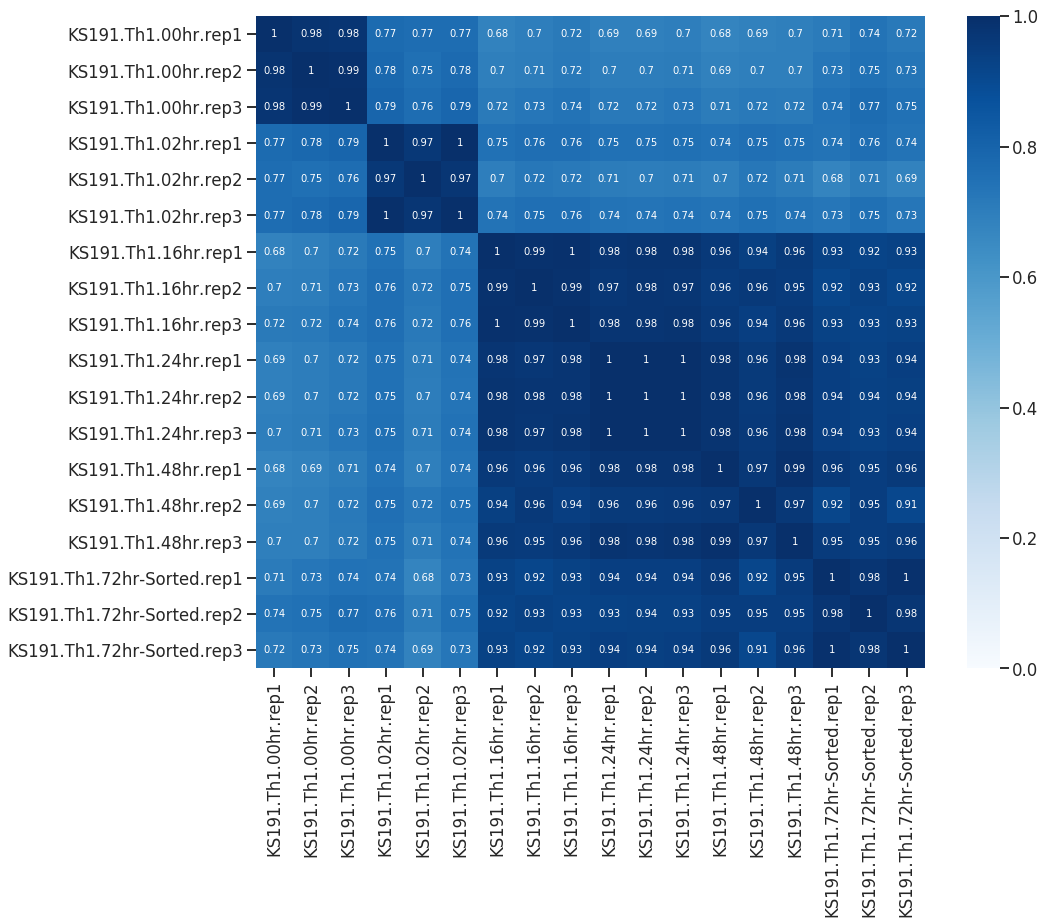

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

th1 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.count.txt', sep='\t')
th1 = th1.drop(columns=['Unnamed: 0','Geneid'])
correlations = th1.corr()

fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax, vmin=0, vmax=1)
#plt.savefig('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/correlation_plot_between_replicates.pdf')
plt.show()

### Counts for Th17

In [9]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Th17/data/rna_seq/counts/

In [6]:
import pandas as pd

Th17_bulk_counts = pd.read_csv('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/Th17-mmTh0.counts.txt', sep='\t')
#Th17_counts.columns
Th17_bulk_counts = Th17_bulk_counts[['Geneid','Th17.Bulk.00hr.rep1','Th17.Bulk.00hr.rep2','Th17.Bulk.00hr.rep3','Th17.Bulk.00hr.rep4',
                           'Th17.Bulk.02hr.rep1','Th17.Bulk.02hr.rep2','Th17.Bulk.02hr.rep3','Th17.Bulk.02hr.rep4',
                           'Th17.Bulk.16hr.rep1','Th17.Bulk.16hr.rep2','Th17.Bulk.16hr.rep3','Th17.Bulk.16hr.rep4',
                           'Th17.Bulk.24hr.rep1','Th17.Bulk.24hr.rep2','Th17.Bulk.24hr.rep3','Th17.Bulk.24hr.rep4',
                           'Th17.Bulk.48hr.rep1','Th17.Bulk.48hr.rep2','Th17.Bulk.48hr.rep3','Th17.Bulk.48hr.rep4']]

Th17_sorted_counts = pd.read_csv('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/Th17.Sorted.72hr.counts.txt', sep='\t')
Th17_sorted_counts = Th17_sorted_counts[['Geneid','Th17.Sorted.72hr.rep1','Th17.Sorted.72hr.rep2','Th17.Sorted.72hr.rep3','Th17.Sorted.72hr.rep4']]

Th17_counts = Th17_bulk_counts.merge(Th17_sorted_counts, on='Geneid', how='outer')
Th17_counts.to_csv('/data/reddylab/Revathy/collabs/Keith/Th17/data/rna_seq/counts/Th17.counts.txt', sep='\t')


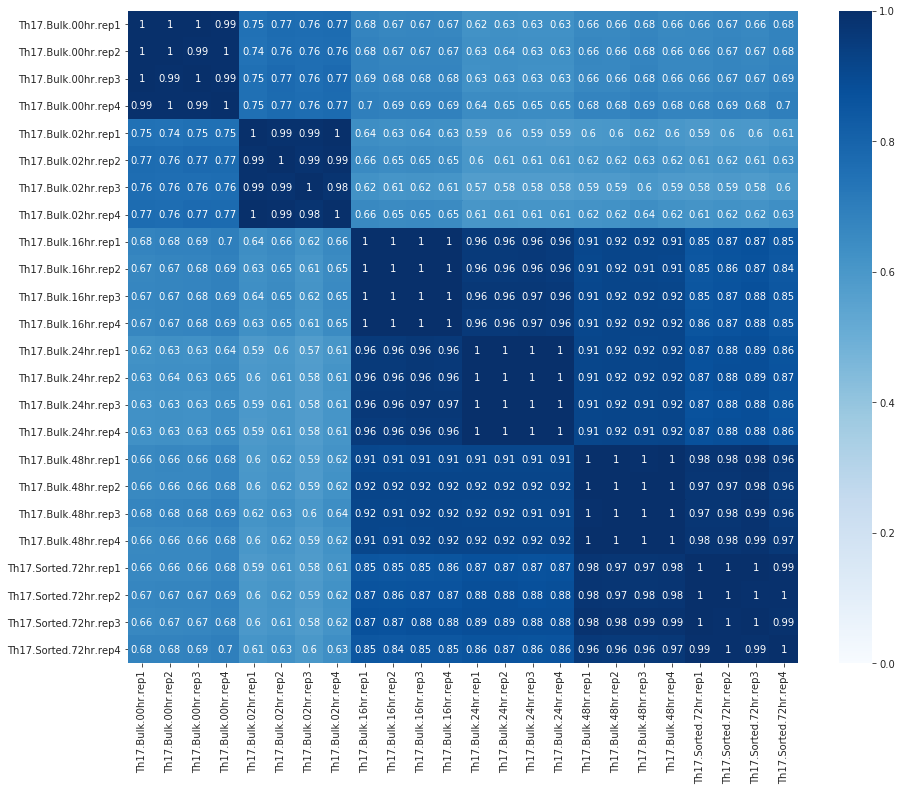

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

th17 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th17/data/rna_seq/counts/Th17.counts.txt', sep='\t')
th17 = th17.drop(columns=['Unnamed: 0','Geneid'])
correlations = th17.corr()

fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax, vmin=0, vmax=1)
#plt.savefig('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/correlation_plot_between_replicates.pdf')
plt.show()

In [26]:
import pandas as pd

Treg_counts = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/counts/Treg_Th0.counts.txt', sep='\t')
Treg_counts = Treg_counts[['Geneid', 'mmTreg.Bulk.00hr.rep1',
       'mmTreg.Bulk.00hr.rep2', 'mmTreg.Bulk.00hr.rep3',
       'mmTreg.Bulk.00hr.rep4', 'mmTreg.Bulk.02hr.rep2',
       'mmTreg.Bulk.02hr.rep3', 'mmTreg.Bulk.02hr.rep4',
       'mmTreg.Bulk.16hr.rep2', 'mmTreg.Bulk.16hr.rep3',
       'mmTreg.Bulk.16hr.rep4', 'mmTreg.Bulk.24hr.rep1',
       'mmTreg.Bulk.24hr.rep2', 'mmTreg.Bulk.24hr.rep3',
       'mmTreg.Bulk.24hr.rep4', 'mmTreg.Bulk.48hr.rep1',
       'mmTreg.Bulk.48hr.rep2', 'mmTreg.Bulk.48hr.rep3',
       'mmTreg.Bulk.48hr.rep4', 'mmTreg.Sorted.72hr.rep1',
       'mmTreg.Sorted.72hr.rep2', 'mmTreg.Sorted.72hr.rep3',
       'mmTreg.Sorted.72hr.rep4']]
Treg_counts.to_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/counts/Treg.counts.txt', sep='\t')

In [21]:
import pandas as pd

Th0_sorted_files = [
'/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep1.star2.featurecounts.counts.txt',
'/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep2.star2.featurecounts.counts.txt',
'/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep3.star2.featurecounts.counts.txt',
'/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated_sorted.72h.rep4.star2.featurecounts.counts.txt'
]

def col_name(s):
    items = ['sorted', 'Sorted']
    name = '.'.join(s.split('/')[-1].split('.')[:3])
    if name.startswith('mm'):
        if any(i in s for i in items):
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated_sorted','.Sorted').replace('h.','hr.').split('.')[:4])
        else:
            return '.'.join(s.split('/')[-1].replace('.rna_seq.activated','.Sorted').replace('h.','hr.').split('.')[:4])
        
    else:
        if any(i in s for i in items):
            split_words = '.'.join(s.split('.')[1:3])
            rev_words = '.'.join(list(reversed(s.split('.')[1:3])))
            return '.'.join(s.split('/')[-1].replace(split_words, rev_words).split('.')[:4])
        else:
            s = re.sub('17.', '17.Sorted.', s)
            return '.'.join(s.split('/')[-1].split('.')[:4])
        
        
df=None
for file in Th0_sorted_files:
    df_tmp = pd.read_csv(file, sep='\t', skiprows=1, index_col=0)
    df_tmp.columns = df_tmp.columns[:-1].tolist() + [col_name(file)]
    if df is None:
        df = df_tmp.loc[:,[df_tmp.columns[-1]]]
    else:
        df = df.join(df_tmp.loc[:, df_tmp.columns[-1]], how='right')


count_columns = ["rep" in c for c in df.columns]
df.loc[:, count_columns] = df.loc[:, count_columns].astype(dtype='int')
df.columns = df.columns.str.replace('_','.')
df.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th0_sorted.count.txt', sep='\t')



In [23]:
!head /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th0_sorted.count.txt

Geneid	mmTh0.Sorted.72hr.rep1	mmTh0.Sorted.72hr.rep2	mmTh0.Sorted.72hr.rep3	mmTh0.Sorted.72hr.rep4
ENSMUSG00000102693.1	0	0	0	0
ENSMUSG00000064842.1	0	0	0	0
ENSMUSG00000051951.5	0	0	0	0
ENSMUSG00000102851.1	0	0	0	0
ENSMUSG00000103377.1	0	0	0	0
ENSMUSG00000104017.1	0	0	0	0
ENSMUSG00000103025.1	0	0	0	0
ENSMUSG00000089699.1	0	0	0	0
ENSMUSG00000103201.1	0	0	0	0


In [25]:
old_Th0_counts = pd.read_csv('/data/reddylab/Revathy/collabs/rna-seq_Siklenka/mmTh0.counts.txt', sep='\t')
sorted_Th0_counts = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th0_sorted.count.txt', sep='\t')

Th0_counts = old_Th0_counts.merge(sorted_Th0_counts, on='Geneid', how='outer')
Th0_counts = Th0_counts[['Geneid','mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4',
       'mmTh0.Bulk.02hr.rep1','mmTh0.Bulk.02hr.rep3','mmTh0.Bulk.02hr.rep4',
       'mmTh0.Bulk.16hr.rep1','mmTh0.Bulk.16hr.rep2','mmTh0.Bulk.16hr.rep3','mmTh0.Bulk.16hr.rep4',
       'mmTh0.Bulk.24hr.rep1','mmTh0.Bulk.24hr.rep2','mmTh0.Bulk.24hr.rep3','mmTh0.Bulk.24hr.rep4',
       'mmTh0.Bulk.48hr.rep1','mmTh0.Bulk.48hr.rep2','mmTh0.Bulk.48hr.rep3','mmTh0.Bulk.48hr.rep4',
       'mmTh0.Sorted.72hr.rep1','mmTh0.Sorted.72hr.rep2','mmTh0.Sorted.72hr.rep3','mmTh0.Sorted.72hr.rep4']]           

Th0_counts.to_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th0.count.txt', sep='\t')

### Merge all the T cell subtype counts

In [9]:
Th1 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.count.txt', sep='\t')
Th2 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.count.txt', sep='\t')
Th17 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th17/data/rna_seq/counts/Th17.counts.txt', sep='\t')
Treg = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/counts/Treg.counts.txt', sep='\t')
Th0 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th0.count.txt', sep='\t')

Th1_Th2 = Th1.merge(Th2, on='Geneid',how='inner')
Th17_Treg = Th17.merge(Treg, on='Geneid', how='inner')
Th1_Th2_Th17_Treg = Th1_Th2.merge(Th17_Treg, on='Geneid', how='inner')
Th1_Th2_Th17_Treg = Th1_Th2_Th17_Treg.drop(columns=['Unnamed: 0_x_x','Unnamed: 0_y_x','Unnamed: 0_x_y','Unnamed: 0_y_y'])
Th1_Th2_Th17_Treg_Th0 = Th1_Th2_Th17_Treg.merge(Th0, on='Geneid', how='outer')
Th1_Th2_Th17_Treg_Th0 = Th1_Th2_Th17_Treg_Th0.drop(columns='Unnamed: 0')

Th1_Th2_Th17_Treg_Th0 = Th1_Th2_Th17_Treg_Th0[['Geneid','mmTh0.Bulk.02hr.rep1','mmTh0.Bulk.02hr.rep3','mmTh0.Bulk.02hr.rep4',
                                               'KS191.Th1.02hr.rep1','KS191.Th1.02hr.rep2','KS191.Th1.02hr.rep3',
                                               'KS88.Th2.02hr.rep1','KS88.Th2.02hr.rep2','KS88.Th2.02hr.rep3','KS88.Th2.02hr.rep4',
                                               'Th17.Bulk.02hr.rep1','Th17.Bulk.02hr.rep2','Th17.Bulk.02hr.rep3','Th17.Bulk.02hr.rep4',
                                               'mmTreg.Bulk.02hr.rep2','mmTreg.Bulk.02hr.rep3','mmTreg.Bulk.02hr.rep4',
                                               'mmTh0.Bulk.16hr.rep1','mmTh0.Bulk.16hr.rep2','mmTh0.Bulk.16hr.rep3','mmTh0.Bulk.16hr.rep4',
                                               'KS191.Th1.16hr.rep1','KS191.Th1.16hr.rep2','KS191.Th1.16hr.rep3',
                                               'KS88.Th2.16hr.rep1','KS88.Th2.16hr.rep2','KS88.Th2.16hr.rep3','KS88.Th2.16hr.rep4',
                                               'Th17.Bulk.16hr.rep1','Th17.Bulk.16hr.rep2','Th17.Bulk.16hr.rep3','Th17.Bulk.16hr.rep4',
                                               'mmTreg.Bulk.16hr.rep2','mmTreg.Bulk.16hr.rep3','mmTreg.Bulk.16hr.rep4',
                                               'mmTh0.Bulk.24hr.rep1','mmTh0.Bulk.24hr.rep2','mmTh0.Bulk.24hr.rep3','mmTh0.Bulk.24hr.rep4',
                                               'KS191.Th1.24hr.rep1','KS191.Th1.24hr.rep2','KS191.Th1.24hr.rep3',
                                               'KS88.Th2.24hr.rep1','KS88.Th2.24hr.rep2','KS88.Th2.24hr.rep3','KS88.Th2.24hr.rep4',
                                               'Th17.Bulk.24hr.rep1','Th17.Bulk.24hr.rep2','Th17.Bulk.24hr.rep3','Th17.Bulk.24hr.rep4',
                                               'mmTreg.Bulk.24hr.rep1','mmTreg.Bulk.24hr.rep2','mmTreg.Bulk.24hr.rep3','mmTreg.Bulk.24hr.rep4',
                                               'mmTh0.Bulk.48hr.rep1','mmTh0.Bulk.48hr.rep2','mmTh0.Bulk.48hr.rep3','mmTh0.Bulk.48hr.rep4',
                                               'KS191.Th1.48hr.rep1','KS191.Th1.48hr.rep2','KS191.Th1.48hr.rep3',
                                               'KS88.Th2.48hr.rep1','KS88.Th2.48hr.rep2','KS88.Th2.48hr.rep3','KS88.Th2.48hr.rep4',
                                               'Th17.Bulk.48hr.rep1','Th17.Bulk.48hr.rep2','Th17.Bulk.48hr.rep3','Th17.Bulk.48hr.rep4',
                                               'mmTreg.Bulk.48hr.rep1','mmTreg.Bulk.48hr.rep2','mmTreg.Bulk.48hr.rep3','mmTreg.Bulk.48hr.rep4',
                                               'mmTh0.Sorted.72hr.rep1','mmTh0.Sorted.72hr.rep2','mmTh0.Sorted.72hr.rep3','mmTh0.Sorted.72hr.rep4',
                                               'KS191.Th1.72hr-Sorted.rep1','KS191.Th1.72hr-Sorted.rep2','KS191.Th1.72hr-Sorted.rep3',
                                               'KS88.Th2.72hr-Sort.rep1','KS88.Th2.72hr-Sort.rep2','KS88.Th2.72hr-Sort.rep3','KS88.Th2.72hr-Sort.rep4',
                                               'Th17.Sorted.72hr.rep1','Th17.Sorted.72hr.rep2','Th17.Sorted.72hr.rep3','Th17.Sorted.72hr.rep4',
                                               'mmTreg.Sorted.72hr.rep1','mmTreg.Sorted.72hr.rep2','mmTreg.Sorted.72hr.rep3','mmTreg.Sorted.72hr.rep4',
                                               'mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4',
                                               'KS191.Th1.00hr.rep1','KS191.Th1.00hr.rep2','KS191.Th1.00hr.rep3',
                                               'KS88.Th2.00hr.rep1','KS88.Th2.00hr.rep2','KS88.Th2.00hr.rep3','KS88.Th2.00hr.rep4',
                                               'Th17.Bulk.00hr.rep1','Th17.Bulk.00hr.rep2','Th17.Bulk.00hr.rep3','Th17.Bulk.00hr.rep4',
                                               'mmTreg.Bulk.00hr.rep1','mmTreg.Bulk.00hr.rep2','mmTreg.Bulk.00hr.rep3','mmTreg.Bulk.00hr.rep4']]

Th1_Th2_Th17_Treg_Th0.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Th1_Th2_Th17_Treg_Th0.counts.txt', sep='\t')


In [23]:
time_00 = Th1_Th2_Th17_Treg_Th0[['Geneid','mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4',
            'KS191.Th1.00hr.rep1','KS191.Th1.00hr.rep2','KS191.Th1.00hr.rep3',
            'KS88.Th2.00hr.rep1','KS88.Th2.00hr.rep2','KS88.Th2.00hr.rep3','KS88.Th2.00hr.rep4',
            'Th17.Bulk.00hr.rep1','Th17.Bulk.00hr.rep2','Th17.Bulk.00hr.rep3','Th17.Bulk.00hr.rep4',
            'mmTreg.Bulk.00hr.rep1','mmTreg.Bulk.00hr.rep2','mmTreg.Bulk.00hr.rep3','mmTreg.Bulk.00hr.rep4']]
time_00.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')

                                 

### Individual tables for each T cell subtype wrt to Th0

In [9]:
!mkdir -p /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all

In [10]:
import pandas as pd

Th1 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th1.count.txt', sep='\t')
Th2 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th2/data/rna_seq/counts/Th2.count.txt', sep='\t')
Th17 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th17/data/rna_seq/counts/Th17.counts.txt', sep='\t')
Treg = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/counts/Treg.counts.txt', sep='\t')
Th0 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/Th0.count.txt', sep='\t')

Th1_Th0 = Th1.merge(Th0, on='Geneid', how='inner')
Th1_Th0 = Th1_Th0.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
Th1_Th0_00hr = Th1_Th0[['Geneid','KS191.Th1.00hr.rep1','KS191.Th1.00hr.rep2','KS191.Th1.00hr.rep3',
                        'mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4']]
Th1_Th0.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Th1_Th0.count.txt', sep='\t', index=False)
Th1_Th0_00hr.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Th1_Th0_00hr.count.txt', sep='\t', index=False)

Th2_Th0 = Th2.merge(Th0, on='Geneid', how='inner')
Th2_Th0 = Th2_Th0.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
Th2_Th0_00hr = Th2_Th0[['Geneid','KS88.Th2.00hr.rep1','KS88.Th2.00hr.rep2','KS88.Th2.00hr.rep3', 'KS88.Th2.00hr.rep4',
                        'mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4']]
Th2_Th0.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Th2_Th0.count.txt', sep='\t', index=False)
Th2_Th0_00hr.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Th2_Th0_00hr.count.txt', sep='\t', index=False)

Th17_Th0 = Th17.merge(Th0, on='Geneid', how='inner')
Th17_Th0 = Th17_Th0.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
Th17_Th0_00hr = Th17_Th0[['Geneid','Th17.Bulk.00hr.rep1','Th17.Bulk.00hr.rep2','Th17.Bulk.00hr.rep3','Th17.Bulk.00hr.rep4',
                        'mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4']]
Th17_Th0.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Th17_Th0.count.txt', sep='\t', index=False)
Th17_Th0_00hr.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Th17_Th0_00hr.count.txt', sep='\t', index=False)

Treg_Th0 = Treg.merge(Th0, on='Geneid', how='inner')
Treg_Th0 = Treg_Th0.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])
Treg_Th0_00hr = Treg_Th0[['Geneid','mmTreg.Bulk.00hr.rep1','mmTreg.Bulk.00hr.rep2','mmTreg.Bulk.00hr.rep3','mmTreg.Bulk.00hr.rep4',
                        'mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4']]
Treg_Th0.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Treg_Th0.count.txt', sep='\t', index=False)
Treg_Th0_00hr.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/all/Treg_Th0_00hr.count.txt', sep='\t', index=False)


### Data wrangling for the ruvseq correction scaling factor and the countTable

In [7]:
import pandas as pd

Tcell_countTable = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Th1_Th2_Th17_Treg_Th0.counts.txt', sep='\t')
Tcell_countTable = Tcell_countTable.drop(columns='Unnamed: 0')
Tcell_countTable = Tcell_countTable.set_index('Geneid')

ruv_scale_factor = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/ruvseq_correction_scaling_factor_v1_corrected.txt', sep='\t')

ruv_scale_factor = ruv_scale_factor.rename(columns={'Unnamed: 0':'col_name'})

t_ruv_scale_factor = ruv_scale_factor.T
t_ruv_scale_factor = t_ruv_scale_factor.reset_index().drop(columns='index')
t_ruv_scale_factor.columns = t_ruv_scale_factor.iloc[0]
t_ruv_scale_factor = t_ruv_scale_factor.drop(t_ruv_scale_factor.index[0])
t_ruv_scale_factor = t_ruv_scale_factor[Tcell_countTable.columns]

scaled_countTable = pd.DataFrame(Tcell_countTable.values * t_ruv_scale_factor.values, columns=Tcell_countTable.columns, index=Tcell_countTable.index)
scaled_countTable = scaled_countTable.reset_index()

scaled_countTable.to_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/ruvseq_corrected_countTable_v1.txt', sep='\t', index=False)

### Diagnostic plots to see how the timepoint 00hr behaves in each cell type

Scatter plot comparing Th0 and Th2 for timepoint 00hr

In [86]:

time_00 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')
time_00 = time_00.drop(columns='Unnamed: 0')

time_00.columns

Index(['Geneid', 'mmTh0.Bulk.00hr.rep2', 'mmTh0.Bulk.00hr.rep3',
       'mmTh0.Bulk.00hr.rep4', 'KS191.Th1.00hr.rep1', 'KS191.Th1.00hr.rep2',
       'KS191.Th1.00hr.rep3', 'KS88.Th2.00hr.rep1', 'KS88.Th2.00hr.rep2',
       'KS88.Th2.00hr.rep3', 'KS88.Th2.00hr.rep4', 'Th17.Bulk.00hr.rep1',
       'Th17.Bulk.00hr.rep2', 'Th17.Bulk.00hr.rep3', 'Th17.Bulk.00hr.rep4',
       'mmTreg.Bulk.00hr.rep1', 'mmTreg.Bulk.00hr.rep2',
       'mmTreg.Bulk.00hr.rep3', 'mmTreg.Bulk.00hr.rep4'],
      dtype='object')

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log2


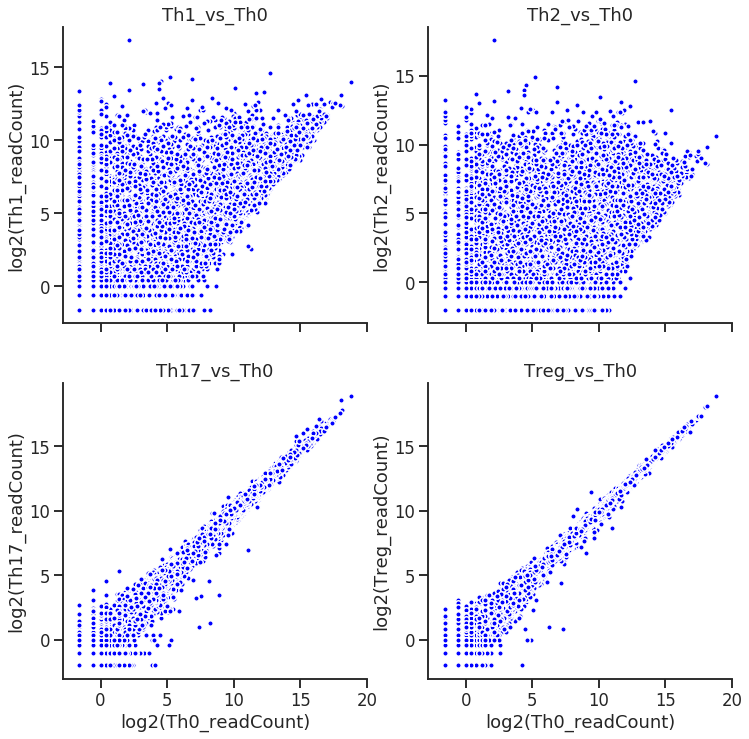

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

time_00 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')
time_00 = time_00.drop(columns='Unnamed: 0')

time_00['Th0_mean'] = time_00[['mmTh0.Bulk.00hr.rep2','mmTh0.Bulk.00hr.rep3','mmTh0.Bulk.00hr.rep4']].mean(axis=1)
time_00['Th2_mean'] = time_00[['KS88.Th2.00hr.rep1','KS88.Th2.00hr.rep2','KS88.Th2.00hr.rep3','KS88.Th2.00hr.rep4']].mean(axis=1)
time_00['Th1_mean'] = time_00[['KS191.Th1.00hr.rep1','KS191.Th1.00hr.rep2','KS191.Th1.00hr.rep3',]].mean(axis=1)
time_00['Th17_mean'] = time_00[['Th17.Bulk.00hr.rep1','Th17.Bulk.00hr.rep2','Th17.Bulk.00hr.rep3','Th17.Bulk.00hr.rep4']].mean(axis=1)
time_00['Treg_mean'] = time_00[['mmTreg.Bulk.00hr.rep1','mmTreg.Bulk.00hr.rep2','mmTreg.Bulk.00hr.rep3', 'mmTreg.Bulk.00hr.rep4']].mean(axis=1)
time_mean = time_00[['Th0_mean','Th1_mean','Th2_mean','Th17_mean','Treg_mean']]

time_mean = time_mean[time_mean.sum(axis=1)>4]
time_mean = np.log2(time_mean)
time_mean = time_mean.replace([np.inf, -np.inf], np.nan).dropna()

fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True)

ax1 = ax[0][0]
points = ax1.scatter(time_mean.Th0_mean, time_mean.Th1_mean, marker='o', s=30, c='blue', edgecolor='white')
ax1.set_ylabel('log2(Th1_readCount)')
ax1.set_title('Th1_vs_Th0')


ax2 = ax[0][1]
points = ax2.scatter(time_mean.Th0_mean, time_mean.Th2_mean, marker='o', s=30, c='blue', edgecolor='white')
ax2.set_ylabel('log2(Th2_readCount)')
ax2.set_title('Th2_vs_Th0')

ax3 = ax[1][0]
points = ax3.scatter(time_mean.Th0_mean, time_mean.Th17_mean, marker='o', s=30, c='blue', edgecolor='white')
ax3.set_xlabel('log2(Th0_readCount)')
ax3.set_ylabel('log2(Th17_readCount)')
ax3.set_title('Th17_vs_Th0')

ax4 = ax[1][1]
points = ax4.scatter(time_mean.Th0_mean, time_mean.Treg_mean, marker='o', s=30, c='blue', edgecolor='white')
ax4.set_xlabel('log2(Th0_readCount)')
ax4.set_ylabel('log2(Treg_readCount)')
ax4.set_title('Treg_vs_Th0')

sns.despine()
plt.show()

In [100]:
time_mean.describe()

,Th0_mean,Th1_mean,Th2_mean,Th17_mean,Treg_mean
count,13071.000000,13071.000000,13071.000000,13071.000000,13071.000000
mean,8.981287,5.688318,3.321343,8.814889,8.924872
std,3.785592,2.727244,2.927702,3.795077,3.779175
min,-1.584963,-1.584963,-2.000000,-2.000000,-2.000000
25%,6.876515,4.058894,1.321928,6.738092,6.786269
50%,9.988685,5.984893,3.129283,9.875749,9.938109
75%,11.666964,7.511752,5.098032,11.484886,11.605422
max,18.783225,16.854994,17.595793,18.867643,18.884554


Correlation between all timepoint 00hr

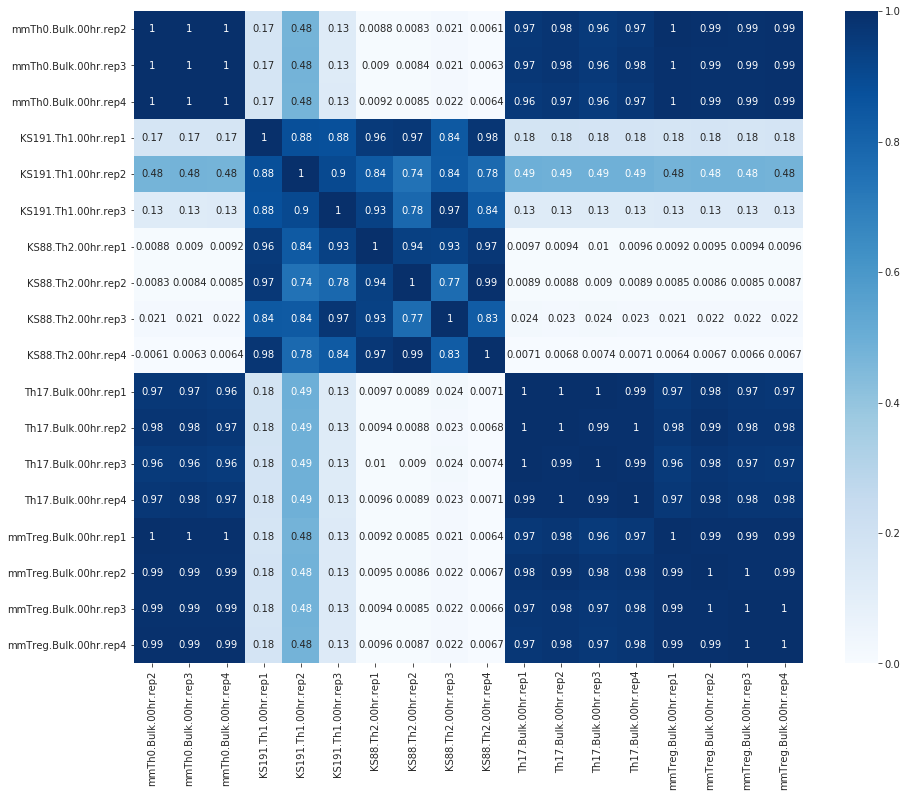

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

time_00 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')
time_00 = time_00.drop(columns=['Unnamed: 0','Geneid'])
time_00_subset = time_00[time_00.sum(axis=1)>18]

correlations = time_00_subset.corr()

fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax, vmin=0, vmax=1)
#plt.savefig('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/correlation_plot_between_replicates.pdf')
plt.show()

Calculate library sizes for Th1 and Th2

In [41]:
%%bash
cd /data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb
echo -n > /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.txt
for ii in {KS191_Th1,KS88_Th2}_*.star2.Log.final.out.read_count.mapped;
do
    iname=$(basename ${ii} | sed 's@.star2.Log.final.out.read_count.mapped@@')
    echo -e $iname"\t"$(cut -f2 ${ii}) \
        >> /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.tmp.txt
done

In [42]:
%%writefile /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.names.txt



Overwriting /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.names.txt


In [45]:
%%bash
paste /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.names.txt /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.tmp.txt \
    | cut -f1,3 \
    > /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.txt

In [46]:
%%bash
cut -d "_" -f2,3,4 \
/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes.txt > /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes_format.txt


Barplots to visulaize library size

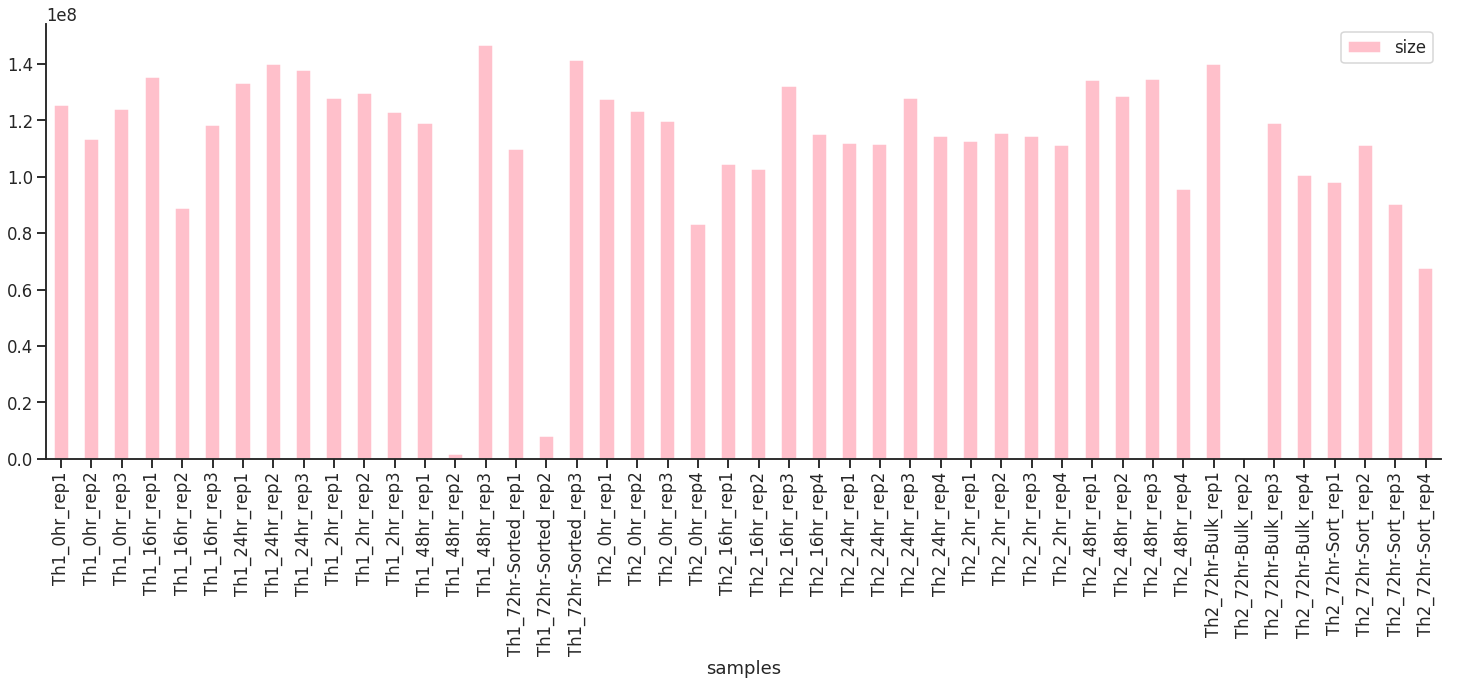

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
%matplotlib inline

lib_size = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes_format.txt', sep='\t', names=['samples','size'])


fig, ax = plt.subplots(figsize=(25,8)) 
lib_size.plot.bar(x='samples', y='size', rot=1, ax=ax, color='pink')
plt.xticks(rotation=90)

sns.despine()
plt.show()

In [39]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

# time_00 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')
# time_00 = time_00.drop(columns=['Unnamed: 0','Geneid'])
# time_00_subset = time_00[time_00.sum(axis=1)>18]

lib_size = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/counts/lib_sizes_format.txt', sep='\t', names=['samples','size'])
lib_size['size_1'] = lib_size['size']
lib_size = lib_size.drop(columns='samples')
t_lib_size = lib_size.T
#t_lib_size = t_lib_size.rename(columns=t_lib_size.iloc[0]).drop(t_lib_size.index[0])
t_lib_size = t_lib_size.reset_index().drop(columns='index')
t_lib_size = t_lib_size.astype('int')
correlations = t_lib_size.corr()


# fig, ax = plt.subplots(figsize=(15,12)) 
# sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax, vmin=0, vmax=1)
# #plt.savefig('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/correlation_plot_between_replicates.pdf')
# plt.show()
# t_lib_size.Th1_0hr_rep1.corr(t_lib_size.Th1_0hr_rep2)




### Correlation between all 00hr timepoints normalized by library sizes

Calculate library sizes for all the timepoints 00hr <br>

Paths to files:
* Th0: `/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/`
* Th1: `/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb`
* Th2: `/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb`
* Th17: `/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb`
* Treg: `/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb`


In [13]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts
cp \
/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep2.star2.Log.final.out.read_count.mapped \
/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep3.star2.Log.final.out.read_count.mapped \
/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTh0.rna_seq.activated.00h.rep4.star2.Log.final.out.read_count.mapped \
/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep1.star2.Log.final.out.read_count.mapped \
/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep2.star2.Log.final.out.read_count.mapped \
/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep3.star2.Log.final.out.read_count.mapped \
/data/reddylab/Alex/encode4_duke/processing/rna_seq/Siklenka_5596_190418A6-pe-revstranded-with-sjdb/mmTreg.rna_seq.activated.00h.rep4.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep1.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep2.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS191_Th1_0hr_rep3.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep1.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep2.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep3.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/KS88_Th2_0hr_rep4.star2.Log.final.out.read_count.mapped \
/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep1.star2.Log.final.out.read_count.mapped \
/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep2.star2.Log.final.out.read_count.mapped \
/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep3.star2.Log.final.out.read_count.mapped \
/data/reddylab/projects/encode4_duke/processing/rna_seq/Siklenka_6358_200714B6-pe-revstranded-with-sjdb/Th17.00hr.rep4.star2.Log.final.out.read_count.mapped \
/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts


In [15]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize
cd /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts
echo -n > /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.txt
for ii in {mmTh0,KS191_Th1,KS88_Th2,Th17,mmTreg}*.star2.Log.final.out.read_count.mapped;
do
    iname=$(basename ${ii} | sed 's@.star2.Log.final.out.read_count.mapped@@')
    echo -e $iname"\t"$(cut -f2 ${ii}) \
        >> /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.tmp.txt
done

In [20]:
%%writefile /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.names.txt
mmTh0.Bulk.00hr.rep2
mmTh0.Bulk.00hr.rep3
mmTh0.Bulk.00hr.rep4
KS191_Th1_0hr_rep1
KS191_Th1_0hr_rep2
KS191_Th1_0hr_rep3
KS88_Th2_0hr_rep1
KS88_Th2_0hr_rep2
KS88_Th2_0hr_rep3
KS88_Th2_0hr_rep4
Th17.Bulk.00hr.rep1
Th17.Bulk.00hr.rep2
Th17.Bulk.00hr.rep3
Th17.Bulk.00hr.rep4
mmTreg.Bulk.00hr.rep1
mmTreg.Bulk.00hr.rep2
mmTreg.Bulk.00hr.rep3
mmTreg.Bulk.00hr.rep4

Overwriting /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.names.txt


In [21]:
%%bash
paste /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.names.txt /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.tmp.txt \
    | cut -f1,3 \
    > /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.txt

In [22]:
%%bash
cut -d "_" -f2,3,4 \
/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes.txt > /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes_format.txt


In [23]:
!cat /data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes_format.txt

mmTh0.Bulk.00hr.rep2	109356578
mmTh0.Bulk.00hr.rep3	136706262
mmTh0.Bulk.00hr.rep4	65147786
Th1_0hr_rep1	125498520
Th1_0hr_rep2	113282242
Th1_0hr_rep3	123960596
Th2_0hr_rep1	127593362
Th2_0hr_rep2	123261638
Th2_0hr_rep3	119815696
Th2_0hr_rep4	83105254
Th17.Bulk.00hr.rep1	68698218
Th17.Bulk.00hr.rep2	82568556
Th17.Bulk.00hr.rep3	112554222
Th17.Bulk.00hr.rep4	105853656
mmTreg.Bulk.00hr.rep1	59195912
mmTreg.Bulk.00hr.rep2	142874206
mmTreg.Bulk.00hr.rep3	52964476
mmTreg.Bulk.00hr.rep4	142207170


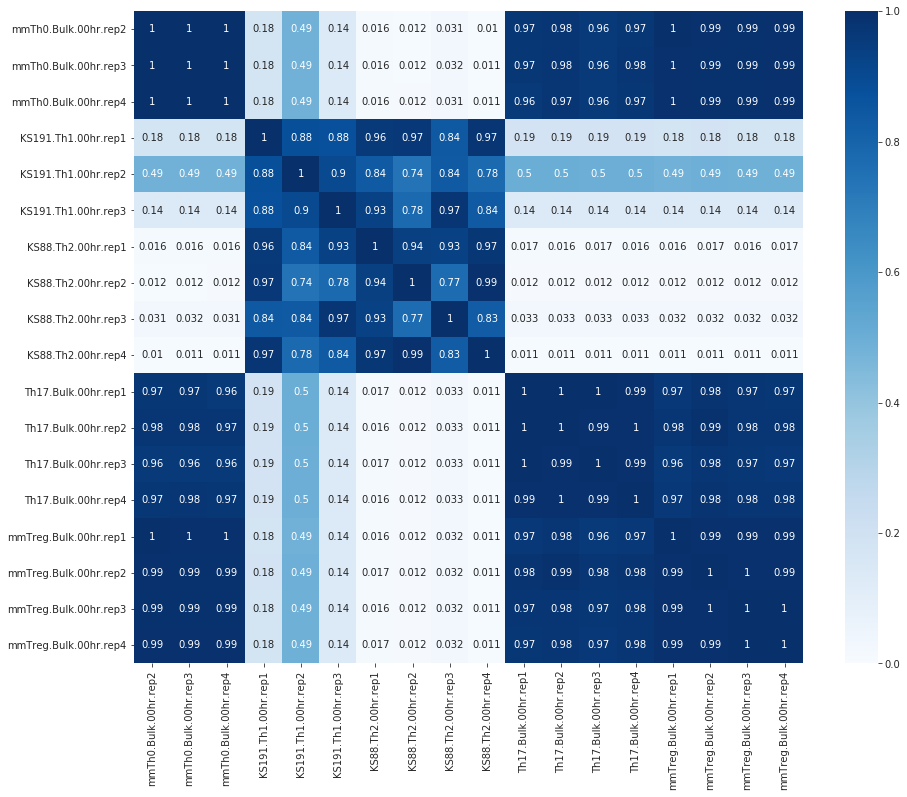

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_context("talk")
sns.set_style("whitegrid")
plt.rcParams['pdf.fonttype'] = 3
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline


lib_size = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/readcounts/libsize/lib_sizes_format.txt', sep='\t', header=None)
t_lib_size = lib_size.T
t_lib_size = t_lib_size.rename(columns=t_lib_size.iloc[0]).drop(t_lib_size.index[0])
t_lib_size = t_lib_size.reset_index().drop(columns='index')
t_lib_size = t_lib_size.astype('int')


time_00 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')
time_00 = time_00.drop(columns=['Unnamed: 0','Geneid'])
time_00_scaled = time_00.div(t_lib_size.iloc[0])
time_00_scaled_subset = time_00_scaled[time_00_scaled.sum(axis=1)>0]

correlations = time_00_scaled_subset.corr()

fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(correlations, annot=True, cmap='Blues', ax=ax, vmin=0, vmax=1)
#plt.savefig('/data/reddylab/Revathy/collabs/Keith/Treg/data/rna_seq/correlation_plot_between_replicates.pdf')
plt.show()

Histogram of log distribution of geneCounts for timepoint 00hr

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()


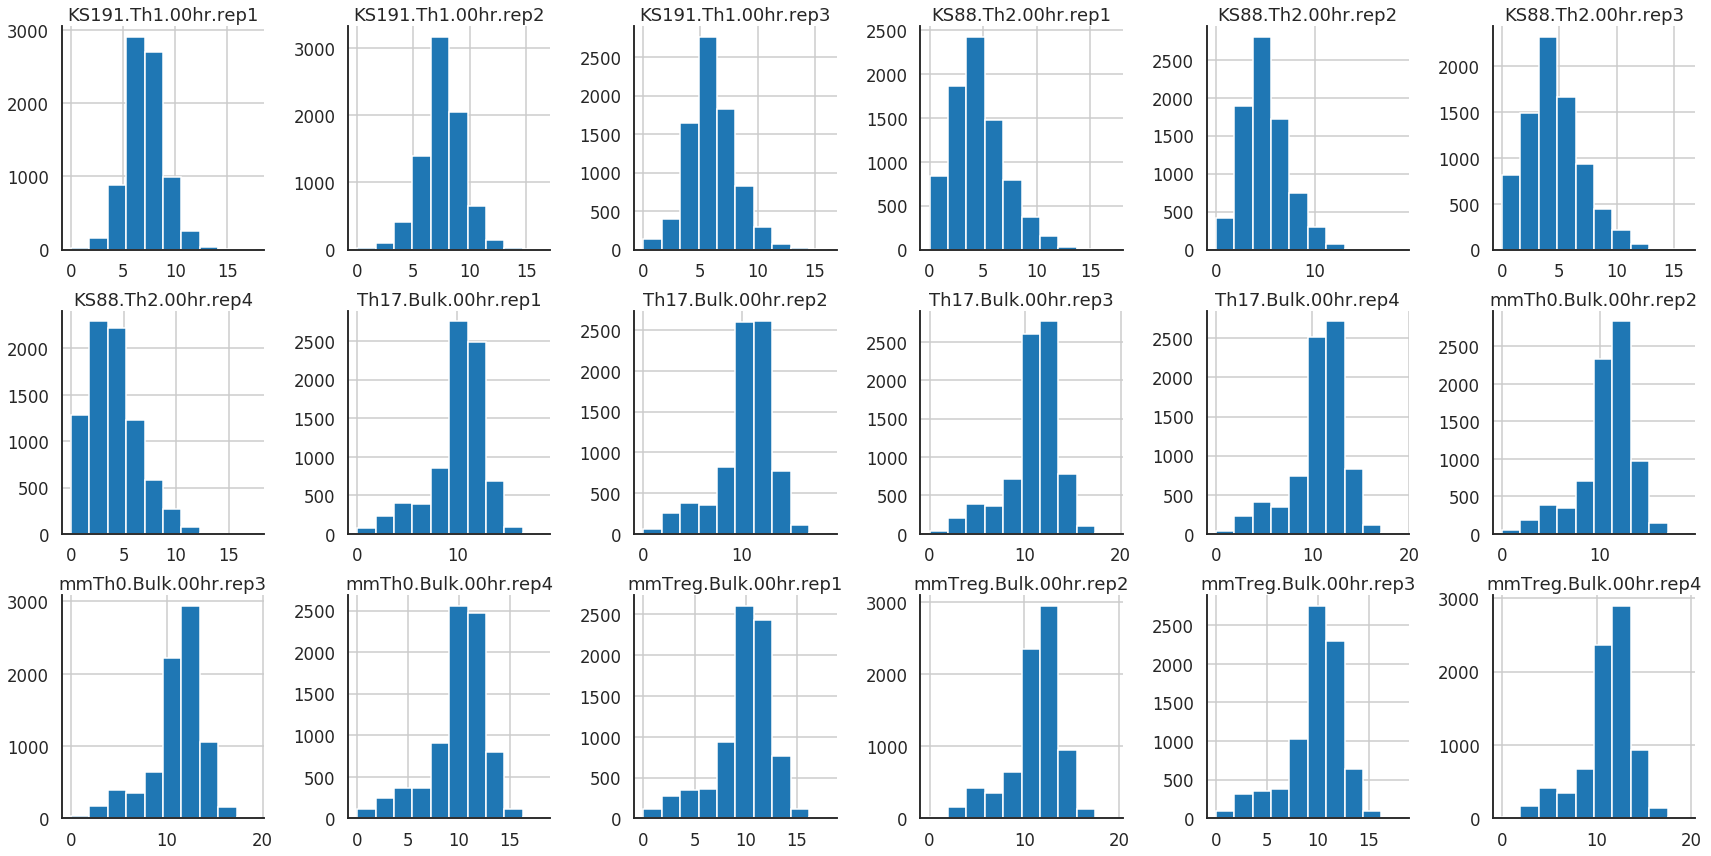

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("white")

#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

time_00 = pd.read_csv('/data/reddylab/Revathy/collabs/Keith/Tcell/data/rna_seq/counts/Tcell_timepoint_00.count.txt', sep='\t')
time_00 = time_00.drop(columns=['Unnamed: 0','Geneid'])
time_00 = np.log2(time_00)
time_00 = time_00.replace([np.inf, -np.inf], np.nan).dropna()

fig, axis = plt.subplots(3,6,figsize=(24,12))
time_00.hist(ax=axis)
plt.tight_layout()
sns.despine()
plt.show()

### Re-run featureCounts for the Th1 and Th2 subsets

In [6]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts
sbatch -p all \
    --array=0-17 \
    --mem 16G \
    -o /data/reddylab/Revathy/collabs/Keith/Th1/logs/featureCounts-Th1.%a.out \
    <<'EOF'
#!/bin/bash
samples=( \
    KS191_Th1_0hr_rep1 \
    KS191_Th1_0hr_rep2 \
    KS191_Th1_0hr_rep3 \
    KS191_Th1_2hr_rep1 \
    KS191_Th1_2hr_rep2 \
    KS191_Th1_2hr_rep3 \
    KS191_Th1_16hr_rep1 \
    KS191_Th1_16hr_rep2 \
    KS191_Th1_16hr_rep3 \
    KS191_Th1_24hr_rep1 \
    KS191_Th1_24hr_rep2 \
    KS191_Th1_24hr_rep3 \
    KS191_Th1_48hr_rep1 \
    KS191_Th1_48hr_rep2 \
    KS191_Th1_48hr_rep3 \
    KS191_Th1_72hr-Sorted_rep1 \
    KS191_Th1_72hr-Sorted_rep2 \
    KS191_Th1_72hr-Sorted_rep3
)
sample=${samples[${SLURM_ARRAY_TASK_ID}]}
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -B \
    -T \
    4 \
    -g \
    gene_id \
    -p \
    -s \
    2 \
    -t \
    exon \
    -a \
    /data/reddylab/Reference_Data/Gencode/vM13/gencode.vM13.annotation.gtf \
    -o \
    /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/${sample}.star2.featurecounts.counts.txt \
    /data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/${sample}.star2.Aligned.out.sorted.bam
EOF

Submitted batch job 26862663


In [9]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts
sbatch -p all \
    --array=0-23 \
    --mem 16G \
    -o /data/reddylab/Revathy/collabs/Keith/Th1/logs/featureCounts-Th2.%a.out \
    <<'EOF'
#!/bin/bash
samples=( \
    KS88_Th2_0hr_rep1 \
    KS88_Th2_0hr_rep2 \
    KS88_Th2_0hr_rep3 \
    KS88_Th2_0hr_rep4 \
    KS88_Th2_2hr_rep1 \
    KS88_Th2_2hr_rep2 \
    KS88_Th2_2hr_rep3 \
    KS88_Th2_2hr_rep4 \
    KS88_Th2_16hr_rep1 \
    KS88_Th2_16hr_rep2 \
    KS88_Th2_16hr_rep3 \
    KS88_Th2_16hr_rep4 \
    KS88_Th2_24hr_rep1 \
    KS88_Th2_24hr_rep2 \
    KS88_Th2_24hr_rep3 \
    KS88_Th2_24hr_rep4 \
    KS88_Th2_48hr_rep1 \
    KS88_Th2_48hr_rep2 \
    KS88_Th2_48hr_rep3 \
    KS88_Th2_48hr_rep4 \
    KS88_Th2_72hr-Sort_rep1 \
    KS88_Th2_72hr-Sort_rep2 \
    KS88_Th2_72hr-Sort_rep3 \
    KS88_Th2_72hr-Sort_rep4
)
sample=${samples[${SLURM_ARRAY_TASK_ID}]}
/data/reddylab/software/subread-1.4.6-p4-Linux-x86_64/bin/featureCounts \
    -B \
    -T \
    4 \
    -g \
    gene_id \
    -p \
    -s \
    2 \
    -t \
    exon \
    -a \
    /data/reddylab/Reference_Data/Gencode/vM13/gencode.vM13.annotation.gtf \
    -o \
    /data/reddylab/Revathy/collabs/Keith/Th1/data/rna_seq/featureCounts/${sample}.star2.featurecounts.counts.txt \
    /data/reddylab/Revathy/collabs/Keith/Th1/processing/rna_seq/210928_KS88_Th1Th2_RNAseq_TimeCourse-pe-stranded-with-sjdb/${sample}.star2.Aligned.out.sorted.bam
EOF

Submitted batch job 26862737
